In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("final_dataset.csv")

In [29]:
import pandas as pd

# Your coordinates list (already provided)
coordinates = [
    {"district": "Nyarugenge", "sector": "Nyamirambo", "cell": "Mumena", "latitude": -1.993611, "longitude": 30.044167},
    {"district": "Kicukiro", "sector": "Kigarama", "cell": "Kigarama I", "latitude": -1.9875, "longitude": 30.0646},
    {"district": "Kicukiro", "sector": "Gikondo", "cell": "Rwimbogo", "latitude": -1.969161, "longitude": 30.080966},
    {"district": "Nyarugenge", "sector": "Kigali", "cell": "Kiyovu", "latitude": -1.967222, "longitude": 30.055556},
    {"district": "Kicukiro", "sector": "Gikondo", "cell": "Gikondo", "latitude": -1.969161, "longitude": 30.080966},
    {"district": "Nyarugenge", "sector": "Kigali", "cell": "Muhima", "latitude": -1.9359, "longitude": 30.0534},
    {"district": "Gasabo", "sector": "Remera", "cell": "Nyabisindu", "latitude": -1.9527, "longitude": 30.116},
    {"district": "Gasabo", "sector": "Kimironko", "cell": "Kibagabaga", "latitude": -1.93429, "longitude": 30.1179},
    {"district": "Gasabo", "sector": "Kimironko", "cell": "Nyagatovu", "latitude": -1.93429, "longitude": 30.1179},
    {"district": "Gasabo", "sector": "Remera", "cell": "Rukiri II", "latitude": -1.9527, "longitude": 30.116},
    {"district": "Kicukiro", "sector": "Gikondo", "cell": "Kanserege", "latitude": -1.9732, "longitude": 30.081},
    {"district": "Gasabo", "sector": "Remera", "cell": "Rukiri I", "latitude": -1.9527, "longitude": 30.116},
    {"district": "Nyarugenge", "sector": "Nyamirambo", "cell": "Rwezamenyo II", "latitude": -1.993611, "longitude": 30.044167},
    {"district": "Nyarugenge", "sector": "Nyamirambo", "cell": "Rwezamenyo I", "latitude": -1.993611, "longitude": 30.044167},
    {"district": "Nyarugenge", "sector": "Kigali", "cell": "Nyarugenge", "latitude": -1.967222, "longitude": 30.055556},
    {"district": "Kicukiro", "sector": "Kigarama", "cell": "Kigarama II", "latitude": -1.9875, "longitude": 30.0646},
    {"district": "Gasabo", "sector": "Kimironko", "cell": "Bibare", "latitude": -1.93429, "longitude": 30.1179},
    {"district": "Kicukiro", "sector": "Kigarama", "cell": "Kigarama III", "latitude": -1.9875, "longitude": 30.0646}
]

# Convert coordinates list to a DataFrame
coords_df = pd.DataFrame(coordinates)

# Assuming your DataFrame is named 'df'
# Merge your DataFrame with the coordinates DataFrame
df_with_coords = df.merge(
    coords_df,
    on=['district', 'sector', 'cell'],
    how='left'  # Use 'left' to keep all rows from df, even if no match (will result in NaN for unmatched)
)

# Verify the new columns are added
print(df_with_coords[['district', 'sector', 'cell', 'latitude', 'longitude']].head())

# Optionally, save the updated DataFrame to a new CSV or Excel file
df_with_coords.to_csv('updated_dataset_with_coordinates.csv', index=False)
# Or save to Excel
df_with_coords.to_excel('updated_dataset_with_coordinates.xlsx', index=False)

     district      sector        cell  latitude  longitude
0  Nyarugenge  Nyamirambo      Mumena -1.993611  30.044167
1    Kicukiro    Kigarama  Kigarama I -1.987500  30.064600
2  Nyarugenge      Kigali      Kiyovu -1.967222  30.055556
3    Kicukiro     Gikondo    Rwimbogo -1.969161  30.080966
4    Kicukiro     Gikondo     Gikondo -1.969161  30.080966


In [32]:
dfb = pd.read_csv("C:/Users/gihoz/OneDrive/Desktop/CEPdash/updated_dataset_with_coordinates.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   issue_id             500 non-null    object 
 1   district             500 non-null    object 
 2   sector               500 non-null    object 
 3   cell                 500 non-null    object 
 4   date_reported        500 non-null    object 
 5   date_resolved        398 non-null    object 
 6   assigned_department  500 non-null    object 
 7   assigned_level       500 non-null    object 
 8   Description          500 non-null    object 
 9   status               500 non-null    object 
 10  escalated            500 non-null    object 
 11  is_overdue           500 non-null    object 
 12  feedback_rating      398 non-null    float64
 13  feedback_comment     398 non-null    object 
dtypes: float64(1), object(13)
memory usage: 54.8+ KB


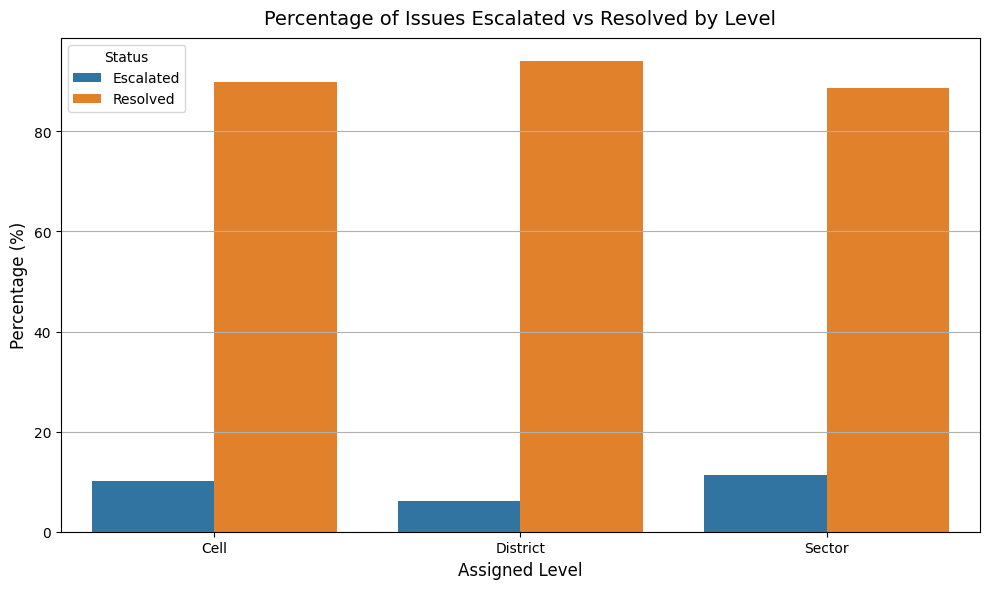


Percentage of Issues by Status and Level:
status assigned_level  Escalated   Resolved
0                Cell  10.144928  89.855072
1            District   6.040268  93.959732
2              Sector  11.258278  88.741722


In [14]:
# Filtering for escalated or resolved issues
filtered_df = df[df['status'].isin(['Escalated', 'Resolved'])]

# Grouping by assigned_level and status to get counts
counts = filtered_df.groupby(['assigned_level', 'status']).size().unstack(fill_value=0)

# Calculating percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Resetting index for plotting
percentages = percentages.reset_index()

# Melting the dataframe for seaborn
percentages_melted = percentages.melt(id_vars='assigned_level', 
                                     value_vars=['Escalated', 'Resolved'],
                                     var_name='Status', 
                                     value_name='Percentage')

# Creating the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages_melted, x='assigned_level', y='Percentage', hue='Status')

# Customizing the plot
plt.title('Percentage of Issues Escalated vs Resolved by Level', fontsize=14, pad=10)
plt.xlabel('Assigned Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Status')
plt.grid(True, axis='y')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

# Printing the percentage values for reference
print("\nPercentage of Issues by Status and Level:")
print(percentages)

C:\Users\gihoz\AppData\Local\Temp\ipykernel_11004\2214577276.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=issue_counts, x='Number of Issues', y='Department', palette='viridis')


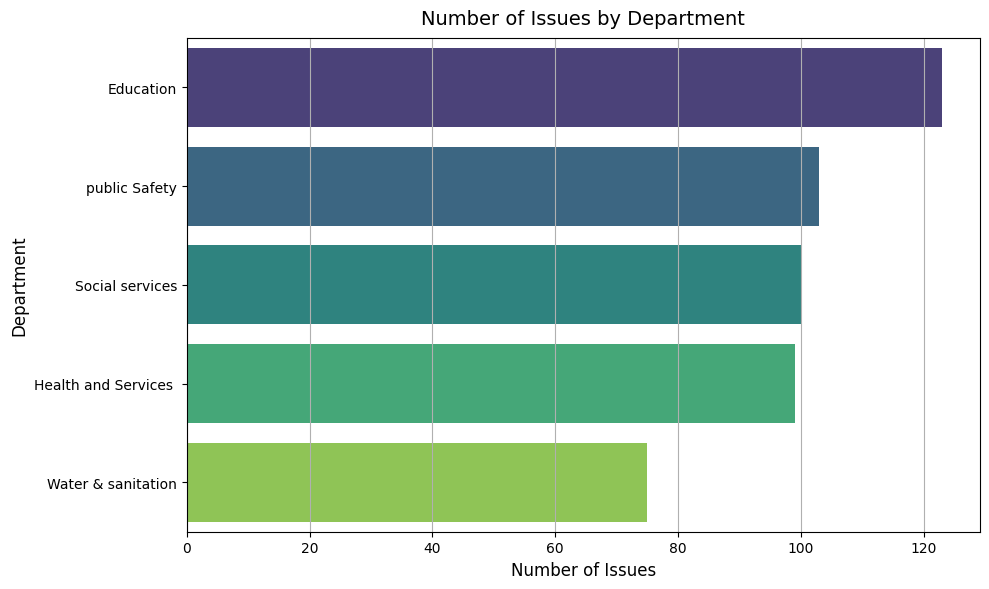


Number of Issues by Department:
             Department  Number of Issues
0             Education               123
1         public Safety               103
2       Social services               100
3  Health and Services                 99
4    Water & sanitation                75


In [15]:


# Counting issues per department
issue_counts = df['assigned_department'].value_counts().reset_index()
issue_counts.columns = ['Department', 'Number of Issues']

# Creating the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=issue_counts, x='Number of Issues', y='Department', palette='viridis')

# Customizing the plot
plt.title('Number of Issues by Department', fontsize=14, pad=10)
plt.xlabel('Number of Issues', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.grid(True, axis='x')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

# Printing the counts for reference
print("\nNumber of Issues by Department:")
print(issue_counts)

C:\Users\gihoz\AppData\Local\Temp\ipykernel_11004\2544235679.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_start'] = df['date_reported'] - pd.to_timedelta(df['date_reported'].dt.dayofweek, unit='d')


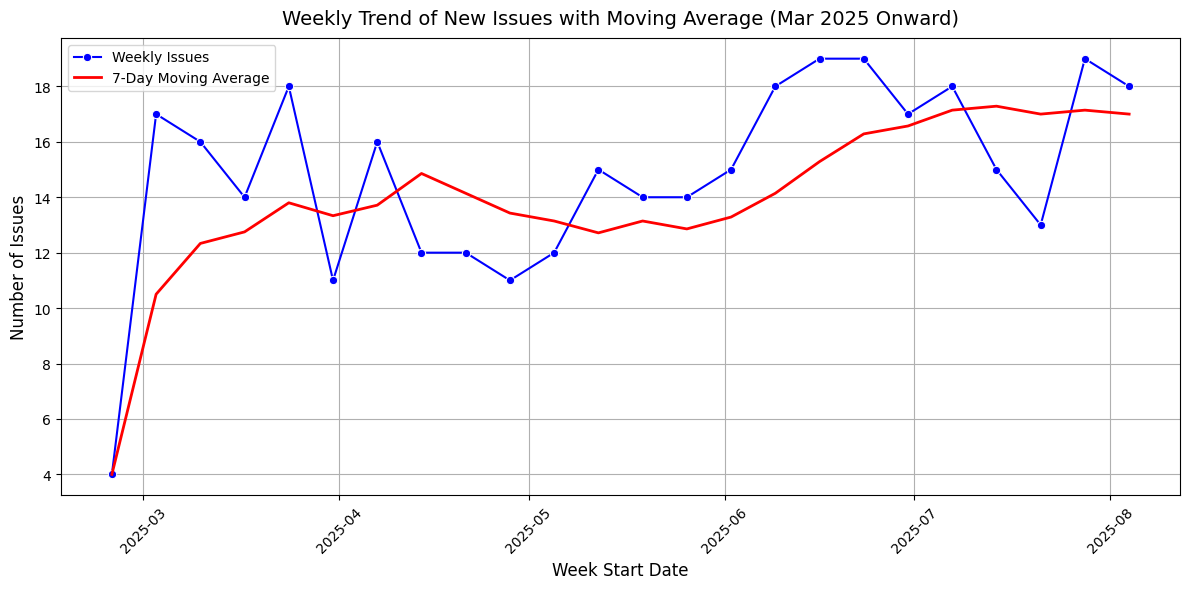


Weekly Issue Counts with Moving Average:
   week_start  Number of Issues  Moving Average
0  2025-02-24                 4        4.000000
1  2025-03-03                17       10.500000
2  2025-03-10                16       12.333333
3  2025-03-17                14       12.750000
4  2025-03-24                18       13.800000
5  2025-03-31                11       13.333333
6  2025-04-07                16       13.714286
7  2025-04-14                12       14.857143
8  2025-04-21                12       14.142857
9  2025-04-28                11       13.428571
10 2025-05-05                12       13.142857
11 2025-05-12                15       12.714286
12 2025-05-19                14       13.142857
13 2025-05-26                14       12.857143
14 2025-06-02                15       13.285714
15 2025-06-09                18       14.142857
16 2025-06-16                19       15.285714
17 2025-06-23                19       16.285714
18 2025-06-30                17       16.57142

In [21]:
# Converting date_reported to datetime
df['date_reported'] = pd.to_datetime(df['date_reported'], format='%d/%m/%Y')

# Filter to start from March 2025
df = df[df['date_reported'] >= '2025-03-01']

# Aggregating issues by week
df['week_start'] = df['date_reported'] - pd.to_timedelta(df['date_reported'].dt.dayofweek, unit='d')
weekly_counts = df.groupby('week_start').size().reset_index(name='Number of Issues')

# Calculating a 7-day moving average for smoothing
weekly_counts['Moving Average'] = weekly_counts['Number of Issues'].rolling(window=7, min_periods=1).mean()

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_counts, x='week_start', y='Number of Issues', marker='o', label='Weekly Issues', color='b')
sns.lineplot(data=weekly_counts, x='week_start', y='Moving Average', label='7-Day Moving Average', color='r', linewidth=2)

# Customizing the plot
plt.title('Weekly Trend of New Issues with Moving Average (Mar 2025 Onward)', fontsize=14, pad=10)
plt.xlabel('Week Start Date', fontsize=12)
plt.ylabel('Number of Issues', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

# Printing the weekly counts for reference
print("\nWeekly Issue Counts with Moving Average:")
print(weekly_counts)

In [24]:
total_issues = len(df)

# Printing the result
print(f"Total number of issues: {total_issues}")

Total number of issues: 500


In [5]:
open_issues = len(df[df['status'] == 'Open'])
print(f"Number of open issues: {open_issues}")

Number of open issues: 24


In [6]:
open_issues = len(df[df['status'] == 'In Progress'])
print(f"Number of open issues: {open_issues}")

Number of open issues: 38


In [7]:
open_issues = len(df[df['status'] == 'Resolved'])
print(f"Number of open issues: {open_issues}")

Number of open issues: 398


In [8]:
escalated_issues = len(df[df['escalated'] == 'Yes'])
print(f"Number of escalated issues: {escalated_issues}")

Number of escalated issues: 40


In [4]:
overdue_issues = len(df[df['is_overdue'] == 'Yes'])
print(f"Number of overdue issues: {overdue_issues}")

Number of overdue issues: 10


In [ ]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/gihoz/OneDrive/Desktop/CEPdash/final_dataset.csv")

# Initialize app
app = dash.Dash(__name__)
app.title = "CitizenConnect | Officials Dashboard"

# Layout
app.layout = html.Div([

    # ===== Top Header =====
    html.Div(
        html.H1("🏠 CitizenConnect | Officials Dashboard", 
                style={'text-align': 'center', 'color': '#2c3e50'}),
        style={
            'background-color': '#ecf0f1',
            'padding': '5px',
            'border-bottom': '2px solid #bdc3c7'
        }
    ),

    # ===== Main Content: Sidebar + Main Visuals =====
    html.Div([
        
        # ---- Sidebar (Left) ----
        html.Div([
            html.H3("Select Location", style={'margin-bottom': '15px'}),

            html.Label("District"),
            dcc.Dropdown(
                id='district-dropdown',
                options=[{'label': d, 'value': d} for d in sorted(df['district'].unique())],
                placeholder="Select District",
                style={'margin-bottom': '20px'}
            ),

            html.Label("Sector"),
            dcc.Dropdown(
                id='sector-dropdown',
                placeholder="Select Sector",
                style={'margin-bottom': '20px'}
            ),

            html.Label("Cell"),
            dcc.Dropdown(
                id='cell-dropdown',
                placeholder="Select Cell",
                style={'margin-bottom': '20px'}
            ),

            html.Hr(),
            html.Button('More Insights', id='insights-button', n_clicks=0, 
                        style={'width': '100%', 'margin-bottom': '10px'}),
            html.Button('Model', id='model-button', n_clicks=0, 
                        style={'width': '100%'})

        ], style={
            'width': '15%',
            'padding': '20px',
            'background-color': '#f8f9fa',
            'border-right': '2px solid #bdc3c7'
        }),

        # ---- Main Visual Area (Right) ----
        html.Div([
            html.H2("Insights", style={'text-align': 'center'}),
            dcc.Graph(id='issues-by-dept', style={'height': '80vh'})
        ], style={
            'width': '80%',
            'padding': '20px'
        })

    ], style={'display': 'flex', 'flex-direction': 'row', 'height': '90vh'})
])

# ===== Callbacks =====

@app.callback(
    Output('sector-dropdown', 'options'),
    Input('district-dropdown', 'value')
)
def update_sector_options(selected_district):
    if selected_district is None:
        return [{'label': s, 'value': s} for s in sorted(df['sector'].unique())]
    return [{'label': s, 'value': s} for s in sorted(df[df['district'] == selected_district]['sector'].unique())]

@app.callback(
    Output('cell-dropdown', 'options'),
    Input('sector-dropdown', 'value')
)
def update_cell_options(selected_sector):
    if selected_sector is None:
        return [{'label': c, 'value': c} for c in sorted(df['cell'].unique())]
    return [{'label': c, 'value': c} for c in sorted(df[df['sector'] == selected_sector]['cell'].unique())]

@app.callback(
    Output('issues-by-dept', 'figure'),
    [Input('district-dropdown', 'value'),
     Input('sector-dropdown', 'value'),
     Input('cell-dropdown', 'value')]
)
def update_graph(selected_district, selected_sector, selected_cell):
    filtered_df = df.copy()
    if selected_district:
        filtered_df = filtered_df[filtered_df['district'] == selected_district]
    if selected_sector:
        filtered_df = filtered_df[filtered_df['sector'] == selected_sector]
    if selected_cell:
        filtered_df = filtered_df[filtered_df['cell'] == selected_cell]

    if filtered_df.empty:
        return px.bar(title="No data available for selected location")

    dept_counts = filtered_df['assigned_department'].value_counts().reset_index()
    dept_counts.columns = ['Department', 'Number of Issues']

    fig = px.bar(
        dept_counts,
        x='Number of Issues',
        y='Department',
        orientation='h',
        title='Issues by Department'
    )
    fig.update_layout(
        xaxis_title="Number of Issues",
        yaxis_title="Department",
        height=500,
        margin=dict(l=40, r=40, t=50, b=40)
    )
    return fig

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/gihoz/OneDrive/Desktop/CEPdash/final_dataset.csv")

# Ensure datetime format
df['date_reported'] = pd.to_datetime(df['date_reported'], format='%d/%m/%Y')

# Initialize app
app = dash.Dash(__name__)
app.title = "CitizenConnect | Officials Dashboard"

# Helper function to create a card
def make_card(title, value, color):
    return html.Div([
        html.H3(title, style={'text-align': 'center', 'color': '#555'}),
        html.H2(value, style={'text-align': 'center', 'color': color})
    ], style={
        'background-color': '#fff',
        'padding': '15px',
        'border-radius': '8px',
        'box-shadow': '0 2px 5px rgba(0,0,0,0.1)',
        'width': '15%',
        'margin': '0 10px'
    })

# Layout
app.layout = html.Div([

    # ===== Top Header =====
    html.Div(
        html.H1("🏠 CitizenConnect | Officials Dashboard", 
                style={'text-align': 'center', 'color': '#2c3e50'}),
        style={
            'background-color': '#ecf0f1',
            'padding': '15px',
            'border-bottom': '2px solid #bdc3c7'
        }
    ),

    # ===== Main Content: Sidebar + Main Visuals =====
    html.Div([
        
        # ---- Sidebar (Left) ----
        html.Div([
            html.H3("Select Location", style={'margin-bottom': '20px'}),

            html.Label("Select Time filter"),
            dcc.Dropdown(
                id='time-filter',
                options=[
                    {'label': 'Today', 'value': 'today'},
                    {'label': 'last 7 Days', 'value': 'last7'}
                ],
                value='last7',
                style={'margin-bottom': '20px'}
            ),

            html.Label("District"),
            dcc.Dropdown(
                id='district-dropdown',
                options=[{'label': d, 'value': d} for d in sorted(df['district'].unique())],
                placeholder="Select District",
                style={'margin-bottom': '20px'}
            ),

            html.Label("Sector"),
            dcc.Dropdown(
                id='sector-dropdown',
                placeholder="Select Sector",
                style={'margin-bottom': '20px'}
            ),

            html.Label("Cell"),
            dcc.Dropdown(
                id='cell-dropdown',
                placeholder="Select Cell",
                style={'margin-bottom': '20px'}
            ),

            html.Hr(),
            html.Button('More Insights', id='insights-button', n_clicks=0, 
                        style={'width': '100%', 'margin-bottom': '10px'}),
            html.Button('Model', id='model-button', n_clicks=0, 
                        style={'width': '100%'})

        ], style={
            'width': '25%',
            'padding': '20px',
            'background-color': '#f8f9fa',
            'border-right': '2px solid #bdc3c7'
        }),

        # ---- Main Visual Area (Right) ----
        html.Div([
            # Cards Row
            html.Div(id='cards-container', style={
                'display': 'flex',
                'flex-direction': 'row',
                'justify-content': 'center',
                'margin-bottom': '20px'
            }),

            dcc.Graph(id='issues-by-dept', style={'height': '80vh'})
        ], style={
            'width': '75%',
            'padding': '20px'
        })

    ], style={'display': 'flex', 'flex-direction': 'row', 'height': '90vh'})
])

# ===== Callbacks =====

@app.callback(
    Output('sector-dropdown', 'options'),
    Input('district-dropdown', 'value')
)
def update_sector_options(selected_district):
    if selected_district is None:
        return [{'label': s, 'value': s} for s in sorted(df['sector'].unique())]
    return [{'label': s, 'value': s} for s in sorted(df[df['district'] == selected_district]['sector'].unique())]

@app.callback(
    Output('cell-dropdown', 'options'),
    Input('sector-dropdown', 'value')
)
def update_cell_options(selected_sector):
    if selected_sector is None:
        return [{'label': c, 'value': c} for c in sorted(df['cell'].unique())]
    return [{'label': c, 'value': c} for c in sorted(df[df['sector'] == selected_sector]['cell'].unique())]
@app.callback(
    Output('cards-container', 'children'),
    [Input('district-dropdown', 'value'),
     Input('sector-dropdown', 'value'),
     Input('cell-dropdown', 'value'),
     Input('time-filter', 'value')]
)
def update_cards(selected_district, selected_sector, selected_cell, time_filter):
    filtered_df = df.copy()
    today = df['date_reported'].max().normalize()

    # Time filter
    if time_filter == 'today':
        filtered_df = filtered_df[filtered_df['date_reported'] == today]
    elif time_filter == 'last7':
        filtered_df = filtered_df[filtered_df['date_reported'] >= today - pd.Timedelta(days=7)]

    # Location filters
    if selected_district:
        filtered_df = filtered_df[filtered_df['district'] == selected_district]
    if selected_sector:
        filtered_df = filtered_df[filtered_df['sector'] == selected_sector]
    if selected_cell:
        filtered_df = filtered_df[filtered_df['cell'] == selected_cell]

    # Clean status values
    status_clean = filtered_df['status'].str.strip().str.lower()

    total_issues = len(filtered_df)
    resolved = (status_clean == 'resolved').sum()
    open_ = (status_clean == 'open').sum()
    inprogress = (status_clean == 'in progress').sum()
    escalated = (status_clean == 'escalated').sum()
    overdue = (filtered_df['is_overdue'].str.strip().str.lower() == 'yes').sum()

    return [
        make_card("Total Issues", total_issues, '#2980b9'),
        make_card("Resolved ", resolved, '#27ae60'),
        make_card("Open ", open_, '#c0392b'),
        make_card("In Progress", inprogress, '#f39c12'),
        make_card("Escalated", escalated, '#8e44ad'),
        make_card("Overdue", overdue, '#d35400')
    ]

@app.callback(
    Output('issues-by-dept', 'figure'),
    [Input('district-dropdown', 'value'),
     Input('sector-dropdown', 'value'),
     Input('cell-dropdown', 'value'),
     Input('time-filter', 'value')]
)
def update_graph(selected_district, selected_sector, selected_cell, time_filter):
    filtered_df = df.copy()
    today = df['date_reported'].max().normalize()

    if time_filter == 'today':
        filtered_df = filtered_df[filtered_df['date_reported'] == today]
    elif time_filter == 'last7':
        filtered_df = filtered_df[filtered_df['date_reported'] >= today - pd.Timedelta(days=7)]

    if selected_district:
        filtered_df = filtered_df[filtered_df['district'] == selected_district]
    if selected_sector:
        filtered_df = filtered_df[filtered_df['sector'] == selected_sector]
    if selected_cell:
        filtered_df = filtered_df[filtered_df['cell'] == selected_cell]

    if filtered_df.empty:
        return px.bar(title="No data available for selected filters")

    dept_counts = filtered_df['assigned_department'].value_counts().reset_index()
    dept_counts.columns = ['Department', 'Number of Issues']
    dept_counts = dept_counts.sort_values('Number of Issues', ascending=True)

    fig = px.bar(
        dept_counts,
        x='Number of Issues',
        y='Department',
        orientation='h',
        title='Issues by Department'
    )
    fig.update_layout(
        xaxis_title="Number of Issues",
        yaxis_title="Department",
        height=500,
        margin=dict(l=40, r=40, t=50, b=40)
    )
    return fig


if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/gihoz/OneDrive/Desktop/CEPdash/final_dataset.csv")

# Ensure datetime format
df['date_reported'] = pd.to_datetime(df['date_reported'], format='%d/%m/%Y')

# Initialize app
app = dash.Dash(__name__)
app.title = "CitizenConnect | Officials Dashboard"

# Helper function to create a card
def make_card(title, value, color):
    return html.Div([
        html.H3(title, style={'text-align': 'center', 'color': '#555'}),
        html.H2(value, style={'text-align': 'center', 'color': color})
    ], style={
        'background-color': '#fff',
        'padding': '15px',
        'border-radius': '8px',
        'box-shadow': '0 2px 5px rgba(0,0,0,0.1)',
        'width': '15%',
        'margin': '0 10px'
    })

# Layout
app.layout = html.Div([

    # ===== Top Header =====
    html.Div(
        html.H1("🏠 CitizenConnect | Officials Dashboard", 
                style={'text-align': 'center', 'color': '#2c3e50'}),
        style={
            'background-color': '#ecf0f1',
            'padding': '15px',
            'border-bottom': '2px solid #bdc3c7'
        }
    ),

    # ===== Main Content: Sidebar + Main Visuals =====
    html.Div([
        
        # ---- Sidebar (Left) ----
        html.Div([
            html.H3("Select Location", style={'margin-bottom': '20px'}),

            html.Label("Select Time filter"),
            dcc.Dropdown(
                id='time-filter',
                options=[
                    {'label': 'Today', 'value': 'today'},
                    {'label': 'last 7 Days', 'value': 'last7'}
                ],
                value='last7',
                style={'margin-bottom': '20px'}
            ),

            html.Label("District"),
            dcc.Dropdown(
                id='district-dropdown',
                options=[{'label': d, 'value': d} for d in sorted(df['district'].unique())],
                placeholder="Select District",
                style={'margin-bottom': '20px'}
            ),

            html.Label("Sector"),
            dcc.Dropdown(
                id='sector-dropdown',
                placeholder="Select Sector",
                style={'margin-bottom': '20px'}
            ),

            html.Label("Cell"),
            dcc.Dropdown(
                id='cell-dropdown',
                placeholder="Select Cell",
                style={'margin-bottom': '20px'}
            ),

            html.Hr(),
            html.Button('More Insights', id='insights-button', n_clicks=0, 
                        style={'width': '100%', 'margin-bottom': '10px'}),
            html.Button('Model', id='model-button', n_clicks=0, 
                        style={'width': '100%'})

        ], style={
            'width': '25%',
            'padding': '20px',
            'background-color': '#f8f9fa',
            'border-right': '2px solid #bdc3c7'
        }),

        # ---- Main Visual Area (Right) ----
        html.Div([
            # Cards Row
            html.Div(id='cards-container', style={
                'display': 'flex',
                'flex-direction': 'row',
                'justify-content': 'center',
                'margin-bottom': '20px'
            }),

            dcc.Graph(id='issues-by-dept', style={'height': '80vh'})
        ], style={
            'width': '75%',
            'padding': '20px'
        })

    ], style={'display': 'flex', 'flex-direction': 'row', 'height': '90vh'})
])

# ===== Callbacks =====

@app.callback(
    Output('sector-dropdown', 'options'),
    Input('district-dropdown', 'value')
)
def update_sector_options(selected_district):
    if selected_district is None:
        return [{'label': s, 'value': s} for s in sorted(df['sector'].unique())]
    return [{'label': s, 'value': s} for s in sorted(df[df['district'] == selected_district]['sector'].unique())]

@app.callback(
    Output('cell-dropdown', 'options'),
    Input('sector-dropdown', 'value')
)
def update_cell_options(selected_sector):
    if selected_sector is None:
        return [{'label': c, 'value': c} for c in sorted(df['cell'].unique())]
    return [{'label': c, 'value': c} for c in sorted(df[df['sector'] == selected_sector]['cell'].unique())]
@app.callback(
    Output('cards-container', 'children'),
    [Input('district-dropdown', 'value'),
     Input('sector-dropdown', 'value'),
     Input('cell-dropdown', 'value'),
     Input('time-filter', 'value')]
)
def update_cards(selected_district, selected_sector, selected_cell, time_filter):
    filtered_df = df.copy()
    today = df['date_reported'].max().normalize()

    # Time filter
    if time_filter == 'today':
        filtered_df = filtered_df[filtered_df['date_reported'] == today]
    elif time_filter == 'last7':
        filtered_df = filtered_df[filtered_df['date_reported'] >= today - pd.Timedelta(days=7)]

    # Location filters
    if selected_district:
        filtered_df = filtered_df[filtered_df['district'] == selected_district]
    if selected_sector:
        filtered_df = filtered_df[filtered_df['sector'] == selected_sector]
    if selected_cell:
        filtered_df = filtered_df[filtered_df['cell'] == selected_cell]

    # Clean status values
    status_clean = filtered_df['status'].str.strip().str.lower()

    total_issues = len(filtered_df)
    resolved = (status_clean == 'resolved').sum()
    open_ = (status_clean == 'open').sum()
    inprogress = (status_clean == 'in progress').sum()
    escalated = (status_clean == 'escalated').sum()
    overdue = (filtered_df['is_overdue'].str.strip().str.lower() == 'yes').sum()

    return [
        make_card("Total Issues", total_issues, '#2980b9'),
        make_card("Resolved ", resolved, '#27ae60'),
        make_card("Open ", open_, '#c0392b'),
        make_card("In Progress", inprogress, '#f39c12'),
        make_card("Escalated", escalated, '#8e44ad'),
        make_card("Overdue", overdue, '#d35400')
    ]

@app.callback(
    Output('issues-by-dept', 'figure'),
    [Input('district-dropdown', 'value'),
     Input('sector-dropdown', 'value'),
     Input('cell-dropdown', 'value'),
     Input('time-filter', 'value')]
)
def update_graph(selected_district, selected_sector, selected_cell, time_filter):
    filtered_df = df.copy()
    today = df['date_reported'].max().normalize()

    if time_filter == 'today':
        filtered_df = filtered_df[filtered_df['date_reported'] == today]
    elif time_filter == 'last7':
        filtered_df = filtered_df[filtered_df['date_reported'] >= today - pd.Timedelta(days=7)]

    if selected_district:
        filtered_df = filtered_df[filtered_df['district'] == selected_district]
    if selected_sector:
        filtered_df = filtered_df[filtered_df['sector'] == selected_sector]
    if selected_cell:
        filtered_df = filtered_df[filtered_df['cell'] == selected_cell]

    if filtered_df.empty:
        return px.bar(title="No data available for selected filters")

    dept_counts = filtered_df['assigned_department'].value_counts().reset_index()
    dept_counts.columns = ['Department', 'Number of Issues']
    dept_counts = dept_counts.sort_values('Number of Issues', ascending=True)

    fig = px.bar(
        dept_counts,
        x='Number of Issues',
        y='Department',
        orientation='h',
        title='Issues by Department'
    )
    fig.update_layout(
        xaxis_title="Number of Issues",
        yaxis_title="Department",
        height=500,
        margin=dict(l=40, r=40, t=50, b=40)
    )
    return fig


if __name__ == '__main__':
    app.run(debug=True)


In [4]:
import plotly.express as px

def bar_issues_by_level(df, level='district', top_n=20):
    """
    level: one of 'district', 'sector', 'cell'
    returns: px.bar figure showing number of issues per level
    """
    if level not in ['district', 'sector', 'cell']:
        raise ValueError("level must be 'district', 'sector' or 'cell'")

    if level not in df.columns:
        raise ValueError(f"Column '{level}' not found in df")

    counts = df[level].fillna('Unknown').value_counts().reset_index()
    counts.columns = [level.capitalize(), 'num_issues']
    counts = counts.head(top_n).sort_values('num_issues', ascending=True)

    fig = px.bar(counts,
                 x='num_issues',
                 y=level.capitalize(),
                 orientation='h',
                 title=f"Issues by {level.capitalize()} (top {top_n})",
                 labels={'num_issues': 'Number of Issues', level.capitalize(): level.capitalize()})
    fig.update_layout(margin=dict(l=60, r=20, t=40, b=40), height=500)
    return fig

# usage:
# fig = bar_issues_by_level(df, level='district')
# dcc.Graph(figure=fig)


In [ ]:
OG


import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/gihoz/OneDrive/Desktop/CEPdash/final_dataset.csv")

# Ensure datetime format
df['date_reported'] = pd.to_datetime(df['date_reported'], format='%d/%m/%Y')

# Initialize app
app = dash.Dash(__name__)
app.title = "CitizenConnect | Officials Dashboard"

# Helper function to create a card
def make_card(title, value, color):
    return html.Div([
        html.H3(title, style={'text-align': 'center', 'color': '#555'}),
        html.H2(value, style={'text-align': 'center', 'color': color})
    ], style={
        'background-color': '#fff',
        'padding': '15px',
        'border-radius': '8px',
        'box-shadow': '0 2px 5px rgba(0,0,0,0.1)',
        'width': '15%',
        'margin': '0 10px'
    })

# Cards + Main Graph layout (keeps reused)
def dashboard_view(filtered_df):
    status_clean = filtered_df['status'].str.strip().str.lower()

    total_issues = len(filtered_df)
    resolved = (status_clean == 'resolved').sum()
    open_ = (status_clean == 'open').sum()
    inprogress = (status_clean == 'in progress').sum()
    escalated = (status_clean == 'escalated').sum()
    overdue = (filtered_df['is_overdue'].str.strip().str.lower() == 'yes').sum()

    dept_counts = filtered_df['assigned_department'].value_counts().reset_index()
    dept_counts.columns = ['Department', 'Number of Issues']
    dept_counts = dept_counts.sort_values('Number of Issues', ascending=True)

    fig = px.bar(
        dept_counts,
        x='Number of Issues',
        y='Department',
        orientation='h',
        title='Issues by Department'
    )
    fig.update_layout(
        xaxis_title="Number of Issues",
        yaxis_title="Department",
        height=500,
        margin=dict(l=40, r=40, t=50, b=40)
    )

    return html.Div([
        html.Div([
            make_card("Total Issues", total_issues, '#2980b9'),
            make_card("Resolved ", resolved, '#27ae60'),
            make_card("Open ", open_, '#c0392b'),
            make_card("In Progress", inprogress, '#f39c12'),
            make_card("Escalated", escalated, '#8e44ad'),
            make_card("Overdue", overdue, '#d35400')
        ], style={
            'display': 'flex',
            'flex-direction': 'row',
            'justify-content': 'center',
            'margin-bottom': '20px'
        }),
        dcc.Graph(figure=fig, style={'height': '70vh'})
    ])

# Layout
app.layout = html.Div([

    # ===== Top Header =====
    html.Div(
        html.H1("🏠 CitizenConnect | Officials Dashboard",
                style={'text-align': 'center', 'color': '#2c3e50'}),
        style={
            'background-color': '#ecf0f1',
            'padding': '15px',
            'border-bottom': '2px solid #bdc3c7'
        }
    ),

    # ===== Main Content: Sidebar + Main Visuals =====
    html.Div([

        # ---- Sidebar (Left) ----
        html.Div([
            html.H3("Select Location", style={'margin-bottom': '20px'}),

            html.Label("Select Time filter"),
            dcc.Dropdown(
                id='time-filter',
                options=[
                    {'label': 'Today', 'value': 'today'},
                    {'label': 'Last 7 Days', 'value': 'last7'}
                ],
                value='last7',
                style={'margin-bottom': '20px'}
            ),

            html.Label("District"),
            dcc.Dropdown(
                id='district-dropdown',
                options=[{'label': d, 'value': d} for d in sorted(df['district'].unique())],
                placeholder="Select District",
                style={'margin-bottom': '20px'}
            ),

            html.Label("Sector"),
            dcc.Dropdown(
                id='sector-dropdown',
                placeholder="Select Sector",
                style={'margin-bottom': '20px'}
            ),

            html.Label("Cell"),
            dcc.Dropdown(
                id='cell-dropdown',
                placeholder="Select Cell",
                style={'margin-bottom': '20px'}
            ),

            html.Hr(),
            html.Button('More Insights', id='insights-button', n_clicks=0,
                        style={'width': '100%', 'margin-bottom': '10px'}),
            html.Button('Model', id='model-button', n_clicks=0,
                        style={'width': '100%'})

        ], style={
            'width': '25%',
            'padding': '20px',
            'background-color': '#f8f9fa',
            'border-right': '2px solid #bdc3c7'
        }),

        # ---- Main Visual Area (Right) ----
        # We place the go-back button here (hidden by default) and a page-content div that we update.
        html.Div(id='main-content', style={
            'width': '75%',
            'padding': '20px'
        }, children=[
            # the go-back button exists at app start (hidden). Callback toggles its style.
            html.Button('⬅ Go Back', id='go-back-button', n_clicks=0,
                        style={'display': 'none', 'margin-bottom': '20px'}),
            # page-content is where we inject dashboard / insights / model content
            html.Div(id='page-content', children=[
                # initial content: show dashboard with default filters
                dashboard_view(df.copy())
            ])
        ])

    ], style={'display': 'flex', 'flex-direction': 'row', 'height': '90vh'})
])

# ===== Callbacks =====

@app.callback(
    Output('sector-dropdown', 'options'),
    Input('district-dropdown', 'value')
)
def update_sector_options(selected_district):
    if selected_district is None:
        return [{'label': s, 'value': s} for s in sorted(df['sector'].unique())]
    return [{'label': s, 'value': s} for s in sorted(df[df['district'] == selected_district]['sector'].unique())]

@app.callback(
    Output('cell-dropdown', 'options'),
    Input('sector-dropdown', 'value')
)
def update_cell_options(selected_sector):
    if selected_sector is None:
        return [{'label': c, 'value': c} for c in sorted(df['cell'].unique())]
    return [{'label': c, 'value': c} for c in sorted(df[df['sector'] == selected_sector]['cell'].unique())]

# Main content switcher with Go Back button (two outputs)
@app.callback(
    [Output('page-content', 'children'),
     Output('go-back-button', 'style')],
    [
        Input('district-dropdown', 'value'),
        Input('sector-dropdown', 'value'),
        Input('cell-dropdown', 'value'),
        Input('time-filter', 'value'),
        Input('insights-button', 'n_clicks'),
        Input('model-button', 'n_clicks'),
        Input('go-back-button', 'n_clicks')
    ]
)
def switch_content(selected_district, selected_sector, selected_cell, time_filter,
                   insights_clicks, model_clicks, back_clicks):
    # prepare filtered dataframe based on current filters
    filtered_df = df.copy()
    today = df['date_reported'].max().normalize()

    # Time filter
    if time_filter == 'today':
        filtered_df = filtered_df[filtered_df['date_reported'] == today]
    elif time_filter == 'last7':
        filtered_df = filtered_df[filtered_df['date_reported'] >= today - pd.Timedelta(days=7)]

    # Location filters
    if selected_district:
        filtered_df = filtered_df[filtered_df['district'] == selected_district]
    if selected_sector:
        filtered_df = filtered_df[filtered_df['sector'] == selected_sector]
    if selected_cell:
        filtered_df = filtered_df[filtered_df['cell'] == selected_cell]

    ctx = dash.callback_context
    if not ctx.triggered:
        # default view: dashboard, hide go-back button
        return dashboard_view(filtered_df), {'display': 'none'}

    button_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if button_id == 'insights-button':
        insights_layout = html.Div([
            html.H2("📊 More Insights", style={'color': '#2c3e50'}),
            html.P("Here you can place extra graphs, maps, or advanced statistics...")
            # add more graphs/charts here as needed
        ])
        return insights_layout, {'display': 'inline-block', 'margin-bottom': '20px'}

    elif button_id == 'model-button':
        model_layout = html.Div([
            html.H2("🤖 Predictive Model", style={'color': '#2c3e50'}),
            html.P("Here you can display model predictions, accuracy scores, and charts...")
            # add model outputs here
        ])
        return model_layout, {'display': 'inline-block', 'margin-bottom': '20px'}

    elif button_id == 'go-back-button':
        # go back to dashboard and hide the go-back button
        return dashboard_view(filtered_df), {'display': 'none'}

    # fallback: dashboard
    return dashboard_view(filtered_df), {'display': 'none'}

if __name__ == '__main__':
    app.run(debug=True)


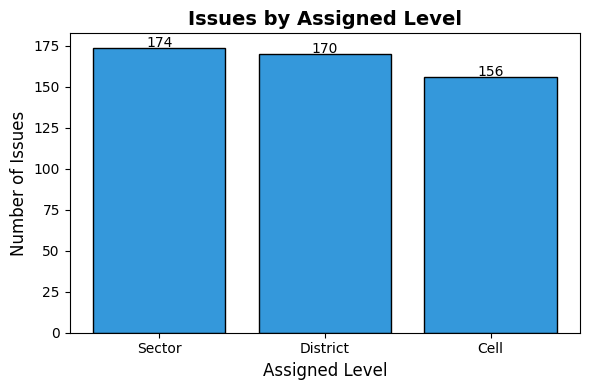

In [20]:

level_counts = df['assigned_level'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(level_counts.index, level_counts.values, color="#3498db", edgecolor="black")

# Labels & title
plt.xlabel("Assigned Level", fontsize=12)
plt.ylabel("Number of Issues", fontsize=12)
plt.title("Issues by Assigned Level", fontsize=14, weight='bold')

# Add values on top of bars
for i, val in enumerate(level_counts.values):
    plt.text(i, val + 0.5, str(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

District field: shapeName


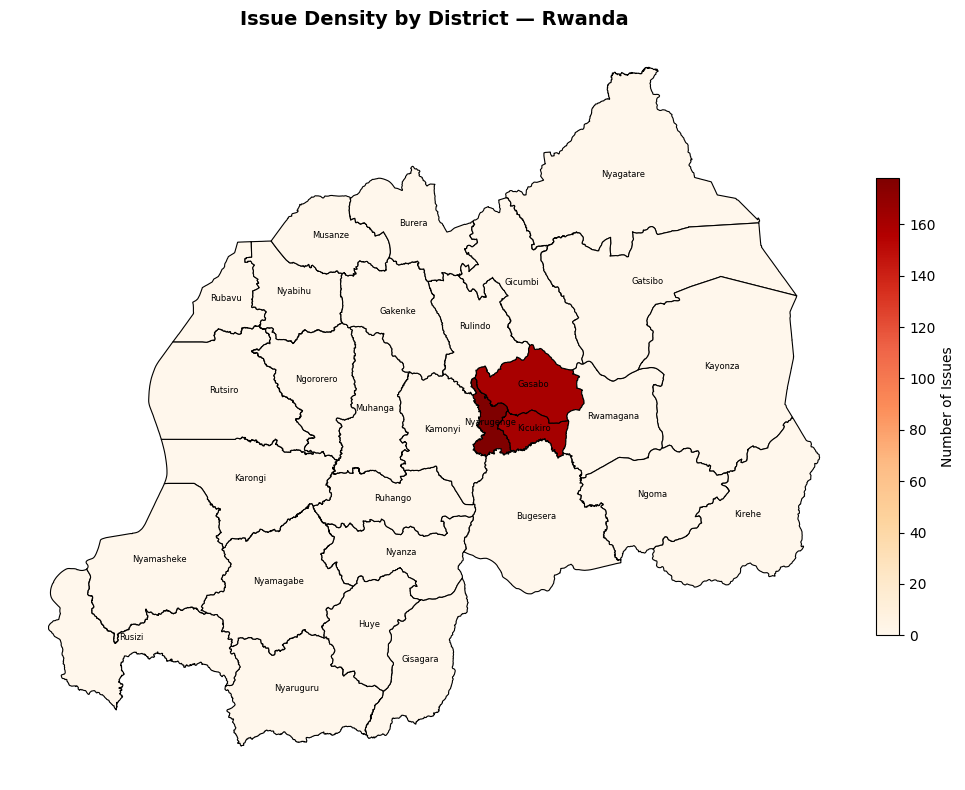

In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib as mpl

# 1) Load GeoJSON
geojson_url = "https://github.com/wmgeolab/geoBoundaries/raw/9469f09/releaseData/gbOpen/RWA/ADM2/geoBoundaries-RWA-ADM2.geojson"
gdf = gpd.read_file(geojson_url)

# 2) Find district name column
dist_field = next((c for c in gdf.columns if "name" in c.lower()), None)
print("District field:", dist_field)

# 3) Merge with issue counts
df['district'] = df['district'].astype(str).str.strip()
district_counts = df.groupby('district').size().reset_index(name='issue_count')
merged = gdf.merge(district_counts, left_on=dist_field, right_on='district', how='left')
merged['issue_count'] = merged['issue_count'].fillna(0)

# 4) Normalize colors for better visibility
norm = Normalize(vmin=merged['issue_count'].min(), vmax=merged['issue_count'].max())

# 5) Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged.plot(
    column='issue_count',
    cmap='OrRd',
    linewidth=0.8,         # border thickness
    edgecolor='black',     # border color
    norm=norm,
    ax=ax
)

# 6) Add labels for districts (optional)
for idx, row in merged.iterrows():
    plt.annotate(
        text=row[dist_field],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha='center',
        fontsize=6,
        color='black'
    )

# 7) Colorbar
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label("Number of Issues", fontsize=10)

# 8) Title & layout
ax.set_title("Issue Density by District — Rwanda", fontsize=14, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
from datetime import datetime

# Load the dataset
df = pd.read_csv('final_dataset.csv')

# Filter only resolved issues
resolved_df = df[df['status'] == 'Resolved']

# Convert date strings to datetime objects
resolved_df['date_reported'] = pd.to_datetime(resolved_df['date_reported'], format='%d/%m/%Y')
resolved_df['date_resolved'] = pd.to_datetime(resolved_df['date_resolved'], format='%d/%m/%Y')

# Calculate resolution time in days
resolved_df['resolution_time'] = (resolved_df['date_resolved'] - resolved_df['date_reported']).dt.days

# Calculate average resolution time
average_resolution_time = resolved_df['resolution_time'].mean()

# Print the result
print(f"Average resolution time for resolved issues: {average_resolution_time:.2f} days")

# Optional: Breakdown by department
if 'assigned_department' in resolved_df.columns:
    department_avg = resolved_df.groupby('assigned_department')['resolution_time'].mean()
    print("\nAverage resolution time by department:")
    print(department_avg.sort_values())

Average resolution time for resolved issues: 15.07 days

Average resolution time by department:
assigned_department
Water & sanitation      14.250000
public Safety           14.375000
Education               15.090909
Social services         15.451220
Health and Services     15.901235
Name: resolution_time, dtype: float64


C:\Users\gihoz\AppData\Local\Temp\ipykernel_18584\3082895114.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resolved_df['date_reported'] = pd.to_datetime(resolved_df['date_reported'], format='%d/%m/%Y')
C:\Users\gihoz\AppData\Local\Temp\ipykernel_18584\3082895114.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resolved_df['date_resolved'] = pd.to_datetime(resolved_df['date_resolved'], format='%d/%m/%Y')
C:\Users\gihoz\AppData\Local\Temp\ipykernel_18584\3082895114.py:15: SettingWithCopyWarning: 
A

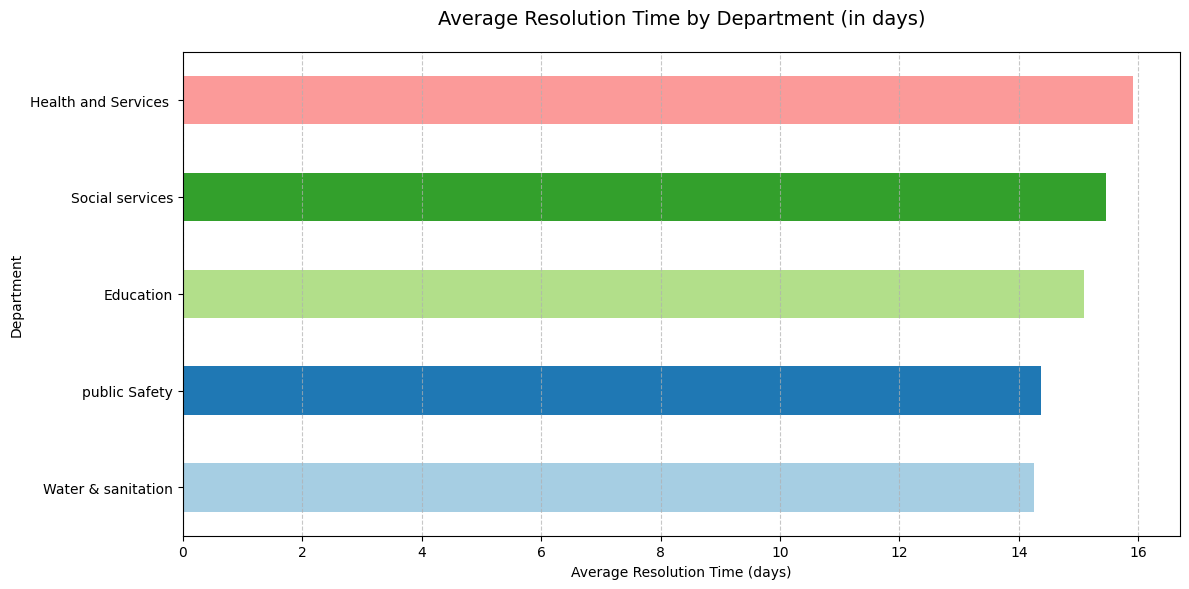

In [35]:
# Alternative bar chart version
plt.figure(figsize=(12, 6))
department_avg.sort_values().plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Average Resolution Time by Department (in days)', pad=20, fontsize=14)
plt.xlabel('Average Resolution Time (days)')
plt.ylabel('Department')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\gihoz\AppData\Local\Temp\ipykernel_18584\1925061975.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resolved_df['date_reported'] = pd.to_datetime(resolved_df['date_reported'], format='%d/%m/%Y')
C:\Users\gihoz\AppData\Local\Temp\ipykernel_18584\1925061975.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resolved_df['date_resolved'] = pd.to_datetime(resolved_df['date_resolved'], format='%d/%m/%Y')
C:\Users\gihoz\AppData\Local\Temp\ipykernel_18584\1925061975.py:18: SettingWithCopyWarning: 
A

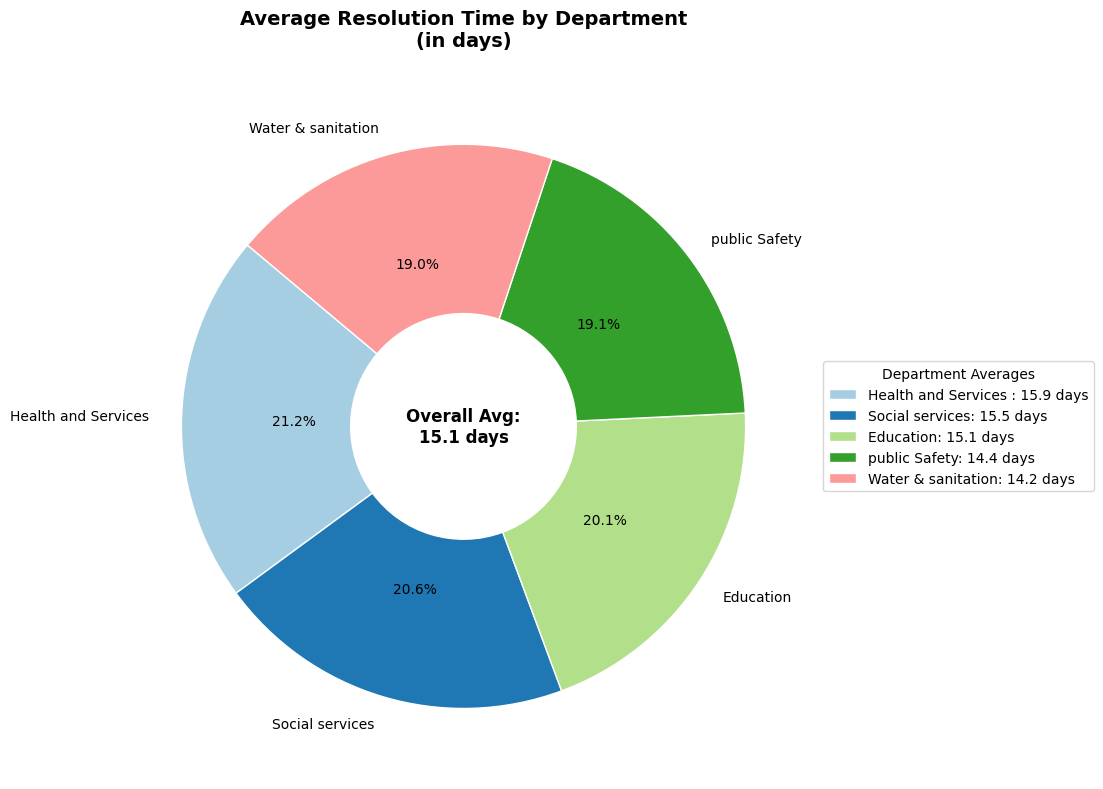

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
df = pd.read_csv('final_dataset.csv')

# Filter only resolved issues with valid dates
resolved_df = df[(df['status'] == 'Resolved') & 
                 (df['date_reported'].notna()) & 
                 (df['date_resolved'].notna())]

# Convert date strings to datetime objects
resolved_df['date_reported'] = pd.to_datetime(resolved_df['date_reported'], format='%d/%m/%Y')
resolved_df['date_resolved'] = pd.to_datetime(resolved_df['date_resolved'], format='%d/%m/%Y')

# Calculate resolution time in days
resolved_df['resolution_time'] = (resolved_df['date_resolved'] - resolved_df['date_reported']).dt.days

# Calculate average resolution time by department
department_avg = resolved_df.groupby('assigned_department')['resolution_time'].mean().sort_values(ascending=False)

# Create donut chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(department_avg, 
                                  labels=department_avg.index, 
                                  autopct='%1.1f%%',
                                  startangle=140,
                                  colors=plt.cm.Paired.colors,
                                  wedgeprops={'width': 0.6, 'edgecolor': 'white', 'linewidth': 1},
                                  textprops={'fontsize': 10})

# Draw a circle at the center to create donut shape
centre_circle = plt.Circle((0,0), 0.4, color='white', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title and formatting
plt.title('Average Resolution Time by Department\n(in days)', pad=20, fontsize=14, fontweight='bold')

# Add average days in the center
total_avg = resolved_df['resolution_time'].mean()
plt.text(0, 0, f'Overall Avg:\n{total_avg:.1f} days', 
         ha='center', va='center', fontsize=12, fontweight='bold')

# Add legend with actual values outside the chart
legend_labels = [f"{dept}: {days:.1f} days" for dept, days in zip(department_avg.index, department_avg)]
plt.legend(legend_labels, title="Department Averages", 
           bbox_to_anchor=(1, 0.5), loc="center left")

plt.tight_layout()
plt.show()